<div style="background-color:gray; font-family:Lora, Georgia, serif; color:black; font-size:160%; text-align:center; border-radius:15px; padding:15px; border:solid 2px black;">
<span style="color:black;"><b>Acerca del conjunto de datos</b></span>
</div>
<p style="font-family:Lora, Georgia, serif; font-size:120%; color:black; line-height:1.6;">
El conjunto de datos está organizado en 3 carpetas (<b>train</b>, <b>test</b>, <b>val</b>) y contiene subcarpetas para cada categoría de imagen (<b>Pneumonia</b>/<b>Normal</b>). Hay 5.863 imágenes de rayos X (formato JPEG) divididas en 2 categorías (<b>Neumonía</b> y <b>Normal</b>).
</p>
<p style="font-family:Lora, Georgia, serif; font-size:120%; color:black; line-height:1.6;">
Las imágenes de rayos X de tórax (vista anteroposterior) se seleccionaron de cohortes retrospectivas de pacientes pediátricos de uno a cinco años de edad del Centro Médico de Mujeres y Niños de Guangzhou, Guangzhou. Las radiografías se tomaron como parte de la atención clínica de rutina.
</p>
<p style="font-family:Lora, Georgia, serif; font-size:120%; color:black; line-height:1.6;">
Se examinaron todas las imágenes para controlar la calidad, asegurándose de que no se incluyeran exploraciones ilegibles o de baja calidad. Dos médicos expertos calificaron los diagnósticos y un tercer médico los validó para eliminar los errores de calificación, lo que proporcionó un conjunto de datos sólido para el entrenamiento del modelo de IA.
</p>

<div style="background-color:gray; font-family:Lora, Georgia, serif; color:black; font-size:160%; text-align:center; border-radius:15px; padding:15px; border:solid 2px black;">
<span style="color:black;"><b>Descripción general del proyecto</b></span>
</div>
<p style="font-family:Lora, Georgia, serif; font-size:120%; color:black; line-height:1.6;">
Este proyecto implica la creación de un modelo de aprendizaje profundo para clasificar las imágenes de rayos X de tórax pediátricos en dos categorías: <b>Neumonía</b> y <b>Normal</b>. Al aprovechar las redes neuronales convolucionales (CNN), el proyecto apunta a desarrollar un clasificador preciso y robusto que ayude en el diagnóstico temprano de neumonía, especialmente en pacientes pediátricos.
</p>
<p style="font-family:Lora, Georgia, serif; font-size:120%; color:black; line-height:1.6;">
Se explorarán varias arquitecturas de redes neuronales y técnicas de optimización para maximizar la precisión y la generalización de la clasificación. Esto incluye el aumento de datos, el aprendizaje por transferencia y el ajuste de hiperparámetros para abordar desafíos como la diversidad limitada de datos y el desequilibrio de clases. </p>

<div style="background-color:gray; font-family:Lora, Georgia, serif; color:black; font-size:160%; text-align:center; border-radius:15px; padding:15px; border:solid 2px black;">
<span style="color:black;"><b>Resumen del conjunto de datos</b></span>
</div>
<p style="font-family:Lora, Georgia, serif; font-size:120%; color:black; line-height:1.6;">
<ul>
<li><b>Categorías:</b> Neumonía y normal</li>
<li><b>Total de imágenes:</b> 5863</li>
<li><b>Formato de imagen:</b> JPEG</li>
<li><b>División de datos:</b> Capacitación, validación, pruebas</li>
<li><b>Fuente:</b> Hospital de Mujeres y Niños de Guangzhou Centro</li>
</ul>
</p>

<div style="background-color:gray; font-family:Lora, Georgia, serif; color:black; font-size:160%; text-align:center; border-radius:15px; padding:15px; border:solid 2px black;">
<span style="color:black;"><b>Objetivos del proyecto</b></span>
</div>
<p style="font-family:Lora, Georgia, serif; font-size:120%; color:black; line-height:1.6;">
<ul>
<li><b>1. Entrenamiento del modelo:</b> Desarrollar un clasificador basado en CNN para distinguir entre imágenes de rayos X normales y de neumonía.</li>
<li><b>2. Aumento de datos:</b> Aplicar técnicas de aumento para mejorar el rendimiento del modelo y mitigar el desequilibrio de clases.</li>
<li><b>3. Evaluación del rendimiento:</b> Utilice métricas como exactitud, precisión, recuperación y puntuación F1 para evaluar el clasificador en datos no vistos.</li>
<li><b>4. Preparación para la implementación:</b> Asegúrese de que el modelo sea lo suficientemente sólido para el uso clínico en el mundo real, con un mínimo de falsos negativos.</li>
</ul>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.font_manager import weight_dict

In [2]:
import os
import sys

sys.path.append(os.getcwd().replace('notebooks', 'src'))

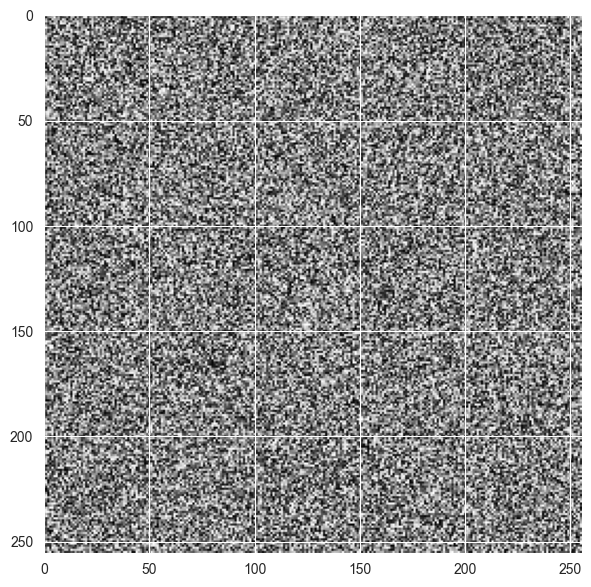

In [3]:
# generate random numpy array with values from 0 to 255
# and a size of 256x256
random_image = np.random.randint(0, 256, (256, 256))
# initialize plot
plt.figure(figsize=(7, 7))
# show grayscale image, nb: cmap, vmin and vmax
plt.imshow(random_image, cmap='gray', vmin=0, vmax=255)
plt.show()

# Carga de datos


In [12]:
import create_folds
from config import TRAIN_DIR, TEST_DIR, VAL_DIR

# Dataset paths
test_dir = TEST_DIR
train_dir = TRAIN_DIR
val_dir = VAL_DIR

# Create DataFrames for train, validation, and test datasets
test_df = create_folds.crear_dataset(test_dir)
train_df = create_folds.crear_dataset(train_dir)
val_df = create_folds.crear_dataset(val_dir)

# Convert labels to numeric: NORMAL -> 0, PNEUMONIA -> 1
test_df['etiqueta'] = test_df['etiqueta'].map({'NORMAL': 0, 'PNEUMONIA': 1})
train_df['etiqueta'] = train_df['etiqueta'].map({'NORMAL': 0, 'PNEUMONIA': 1})
val_df['etiqueta'] = val_df['etiqueta'].map({'NORMAL': 0, 'PNEUMONIA': 1})

In [13]:
test_df['etiqueta'].count()

np.int64(624)

In [14]:
from torch.utils.data import DataLoader
from torchvision import transforms
from config import BATCH_SIZE, TAMANO_IMAGEN


# Create Dataset and DataLoader for Test Set (Custom CNN)
test_transform_cnn = transforms.Compose([
    transforms.Resize((TAMANO_IMAGEN, TAMANO_IMAGEN)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
])

# Usar el dataset creado previamente
test_dataset_cnn = create_folds.DatasetImagenes(test_df, transform=test_transform_cnn)
test_loader_cnn = DataLoader(test_dataset_cnn, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

# Visualizacion de los datos y distribucion/balance de clases

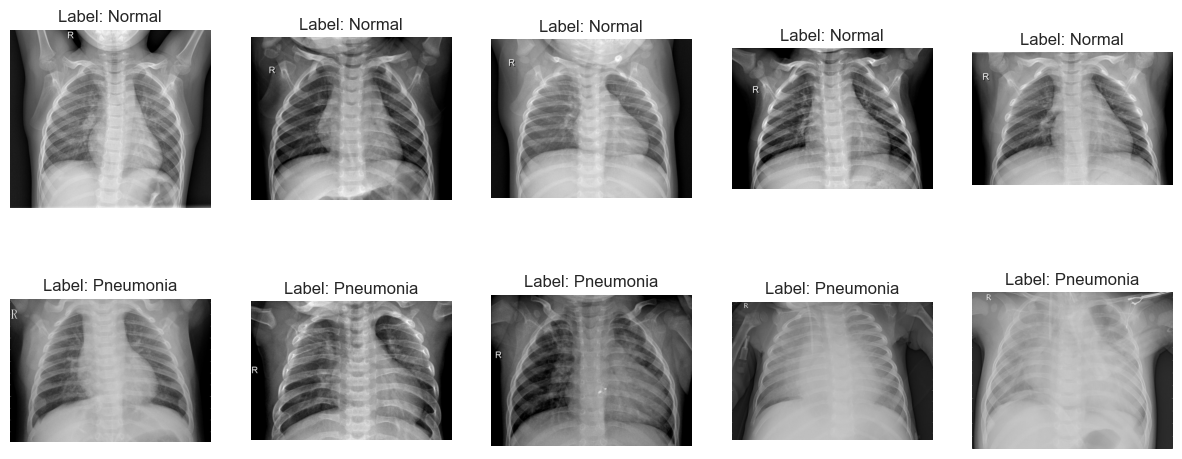

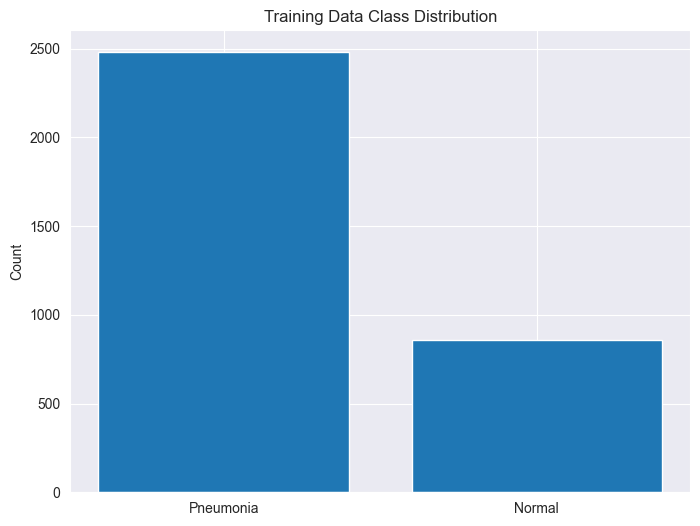

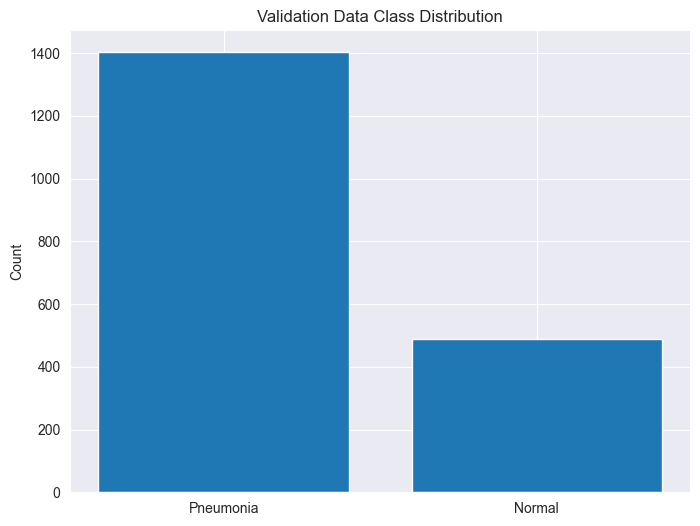

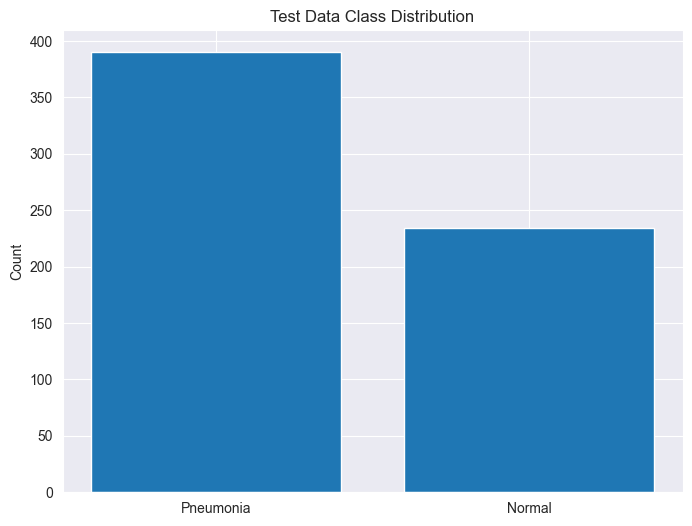

In [15]:
# Visualizing some samples from the dataset
def visualize_samples(df, n_samples=5):
    fig, axes = plt.subplots(2, n_samples, figsize=(15, 6))
    
    # Visualize NORMAL samples
    normal_samples = df[df['etiqueta'] == 0].iloc[:n_samples]
    if normal_samples.empty:
        print("No hay suficientes muestras normales disponibles para visualizar.")
    else:
        for i, row in enumerate(normal_samples.itertuples(index=False)):
            img_path, label = row.ruta_archivo, row.etiqueta
            image = Image.open(img_path).convert('L')  # Open in grayscale (original format)
            axes[0, i].imshow(image, cmap='gray')
            axes[0, i].set_title(f"Label: {['Normal', 'Pneumonia'][label]}")
            axes[0, i].axis('off')

    # Visualize PNEUMONIA samples
    pneumonia_samples = df[df['etiqueta'] == 1].iloc[:n_samples]
    if pneumonia_samples.empty:
        print("No hay suficientes muestras de neumonía disponibles para visualizar.")
    else:
        for i, row in enumerate(pneumonia_samples.itertuples(index=False)):
            img_path, label = row.ruta_archivo, row.etiqueta
            image = Image.open(img_path).convert('L')  # Open in grayscale (original format)
            axes[1, i].imshow(image, cmap='gray')
            axes[1, i].set_title(f"Label: {['Normal', 'Pneumonia'][label]}")
            axes[1, i].axis('off')

    plt.show()

# Show 5 samples from the training data
visualize_samples(train_df)

# Visualizing the class distribution
train_counts = train_df['etiqueta'].value_counts()
val_counts = val_df['etiqueta'].value_counts()
test_counts = test_df['etiqueta'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(['Pneumonia', 'Normal'], train_counts)
plt.title("Training Data Class Distribution")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(['Pneumonia', 'Normal'], val_counts)
plt.title("Validation Data Class Distribution")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(['Pneumonia', 'Normal'], test_counts)
plt.title("Test Data Class Distribution")
plt.ylabel("Count")
plt.show()

# Cargar el modelo entrenado
El modelo entrenado debio ser almacenado con el nombre "custom_cnn.pth" en la carpeta models. Este modelo sera cargado para ser evaluado con los datos de prueba o test y medir los resultados con datos que no ha visto.

In [16]:
import torch
from model_dispatcher import CustomCNN
import warnings
warnings.filterwarnings('ignore')

model = CustomCNN()  # Inicializa el modelo
model.load_state_dict(torch.load('../models/custom_cnn.pth'))
model.eval()

CustomCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (

# Uso de aceleracion grafica para procesamiento paralelo
El siguiente codigo habilita el uso de CUDA para disminuir el tiempo de entrenamiento.

Para instalar CUDA debe instalar los drivers de su tarjeta grafica NVidia y luego instalar los drivers de CUDA.

Cuando haya terminado el proceso de instalacion debe instalar Torch con soporte CUDA para poder hacer uso de esos nuevos recursos disponibles.

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Prediccion y evaluacion de los datos de prueba
A continuacion puede ver la funcion que genera la prediccion con los datos de prueba y calcula la exactitud del resultado de las predicciones.

In [18]:
from sklearn.metrics import accuracy_score


# Function to evaluate the model and return predictions, true labels, and scores
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

# Evaluate Custom CNN from Scratch on Test Set
y_true_cnn, y_pred_cnn = evaluate_model(model, test_loader_cnn)

# Evaluate Pretrained ResNet18 on Test Set
#y_true_resnet, y_pred_resnet = evaluate_model(resnet18, test_loader_resnet)

# Print accuracy for both modelos
accuracy_cnn = accuracy_score(y_true_cnn, y_pred_cnn)
#accuracy_resnet = accuracy_score(y_true_resnet, y_pred_resnet)

print(f"Accuracy of Custom CNN from Scratch: {accuracy_cnn:.4f}")

Accuracy of Custom CNN from Scratch: 0.8413


# Metricas de los datos de prueba
En esta seccion es posible ver las metricas de los datos de prueba.

Custom CNN from Scratch:
[[163  71]
 [ 28 362]]


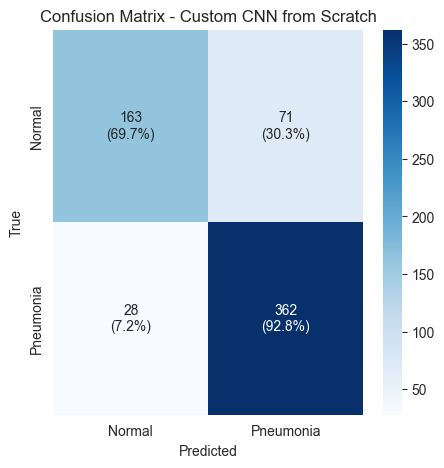

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       234
           1       0.84      0.93      0.88       390

    accuracy                           0.84       624
   macro avg       0.84      0.81      0.82       624
weighted avg       0.84      0.84      0.84       624



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to plot confusion matrix with percentages
def plot_confusion_matrix_with_percentages(cm, model_name):
    plt.figure(figsize=(5, 5))
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    # Annotate with both raw numbers and percentages
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"
    sns.heatmap(cm, annot=annot, fmt="", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Scores and Confusion Matrix for Custom CNN from Scratch
print("Custom CNN from Scratch:")
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)
print(cm_cnn)
plot_confusion_matrix_with_percentages(cm_cnn, "Custom CNN from Scratch")
print("Classification Report:\n", classification_report(y_true_cnn, y_pred_cnn))


# Resultados
A continuacion podemos ver algunas predicciones con sus resultados.

Balanced Predictions from Custom CNN:


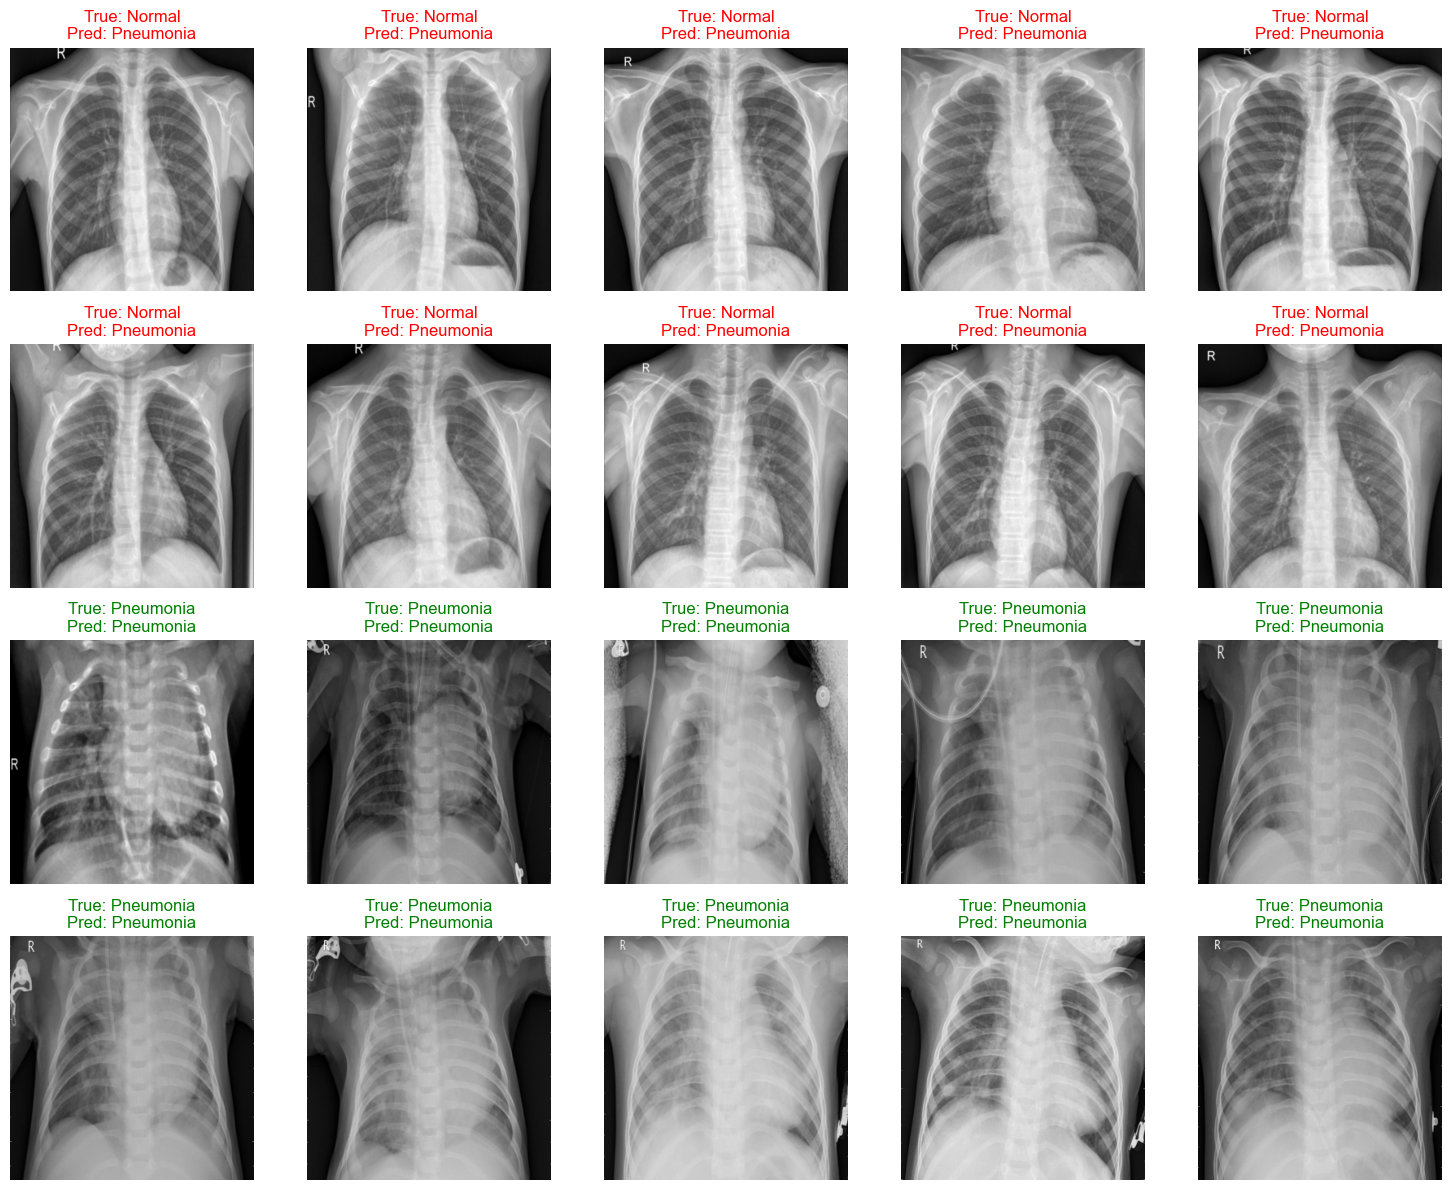

In [13]:
def show_balanced_predictions(model, loader, class_names, num_normal=10, num_pneumonia=10):
    """
    Display images with balanced true labels (Normal and Pneumonia).
    Highlight incorrect predictions in red.
    """
    model.eval()  # Set the model to evaluation mode
    normal_images = []
    pneumonia_images = []

    # Gather predictions for "Normal" and "Pneumonia" separately
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)

            for i in range(images.size(0)):
                # Convert image tensor to numpy array for display
                image = images[i].cpu().numpy().transpose(1, 2, 0)
                if image.shape[-1] == 1:  # Grayscale image
                    image = image.squeeze(-1)

                true_label = labels[i].item()
                pred_label = predictions[i].item()
                label_dict = {
                    "image": image,
                    "true_label": class_names[true_label],
                    "pred_label": class_names[pred_label],
                    "correct": true_label == pred_label,
                }

                # Collect images based on true labels
                if true_label == 0 and len(normal_images) < num_normal:
                    normal_images.append(label_dict)
                elif true_label == 1 and len(pneumonia_images) < num_pneumonia:
                    pneumonia_images.append(label_dict)

            # Break the loop if we have enough images
            if len(normal_images) >= num_normal and len(pneumonia_images) >= num_pneumonia:
                break

    # Combine images for display
    images_to_display = normal_images + pneumonia_images
    rows, cols = 4, 5  # Grid size
    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

    for idx, ax in enumerate(axes.flat):
        if idx < len(images_to_display):
            img_dict = images_to_display[idx]
            image = img_dict["image"]
            true_label = img_dict["true_label"]
            pred_label = img_dict["pred_label"]
            correct = img_dict["correct"]

            # Title with green for correct, red for incorrect
            title_color = "green" if correct else "red"
            ax.imshow(image, cmap="gray" if image.ndim == 2 else None)
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
            ax.axis("off")
        else:
            ax.axis("off")  # Empty cells

    plt.tight_layout()
    plt.show()

# Show predictions for Custom CNN
print("Balanced Predictions from Custom CNN:")
show_balanced_predictions(model, test_loader_cnn, class_names=["Normal", "Pneumonia"], num_normal=10, num_pneumonia=10)